In [1]:
from models.utils import set_global_seed
set_global_seed(42)
from torchvision import transforms
from torchvision.datasets import FashionMNIST, CIFAR10, CIFAR100, MNIST
from models.cleaner import NoiseCleaner
from models.predictor import Predictor

# Instance Independent

In [7]:
train_dataset = FashionMNIST(root='data', train=True, download=True)
transform = transforms.Compose([
            transforms.Grayscale(num_output_channels=3),
            transforms.Resize((224, 224)),
            transforms.ToTensor()
        ])
noise_cleaner = NoiseCleaner(train_dataset, noise_type='iin', model_save_path="fmnist/resnet18/model_resnet18_fmnist_fold_{}.pth", folds_num=5, model='resnet18', train_noise_level=0.2, epochs_num=20, transform=transform)

TypeError: NoiseCleaner.__init__() got an unexpected keyword argument 'folds_num'

In [ ]:
noise_cleaner.clean()

Training fold 1/5...


Epoch 0/20:   0%|          | 0/20 [00:08<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
clean_train_dataset = noise_cleaner.clean_dataset
test_dataset = FashionMNIST(root='data', train=False, download=False)
predictor = Predictor(train_dataset=clean_train_dataset, test_dataset=test_dataset, transform=transform, num_classes=10, model_type='resnet18', batch_size=400, num_epochs=50)

In [ ]:
predictor.train(10)

In [ ]:
predictor.evaluate()

Evaluating: 100%|██████████| 25/25 [00:10<00:00,  2.49it/s]

Test Accuracy: 92.33%


0.9233

# Instance Dependent

## FMnist

In [ ]:
train_dataset = FashionMNIST(root='data', train=True, download=False)
transform = transforms.Compose([
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
augmented_transform = transforms.Compose([
                                # transforms.RandomCrop(size=32, padding=4),
                                # transforms.RandomHorizontalFlip(),
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="fmnist/resnet18/model_resnet18_fmnist_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='wresnet50', train_noise_level=0.2, epochs_num=100, train_pairs=20000, 
                             val_pairs=10000, embedding_dimension=128, lr=1e-3, optimizer='Adam', patience=10, transform=transform,
                             weight_decay=0.0001, training_batch_size=1024, pre_trained=False, dropout_prob=0.2, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce')

Seed: 67
noise count: 12392 out of 60000 data


handling big fold 1/10
number_of_pairs: 4309
Training fold 1/10...


Epoch 10/100:  11%|█         | 11/100 [04:45<38:29, 25.94s/it, val_loss=4.7, val_accuracy=10.6, train_loss=4.7, best_accuracy=10.9]

Early stopping triggered
Loading best model from checkpoint...


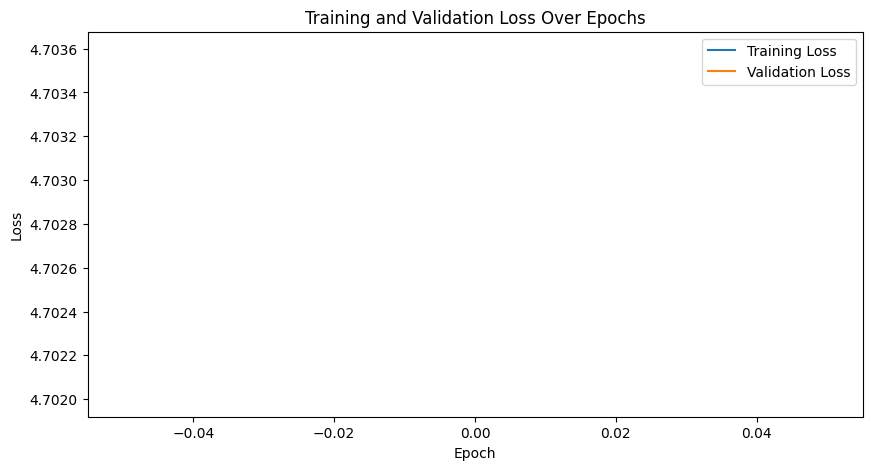

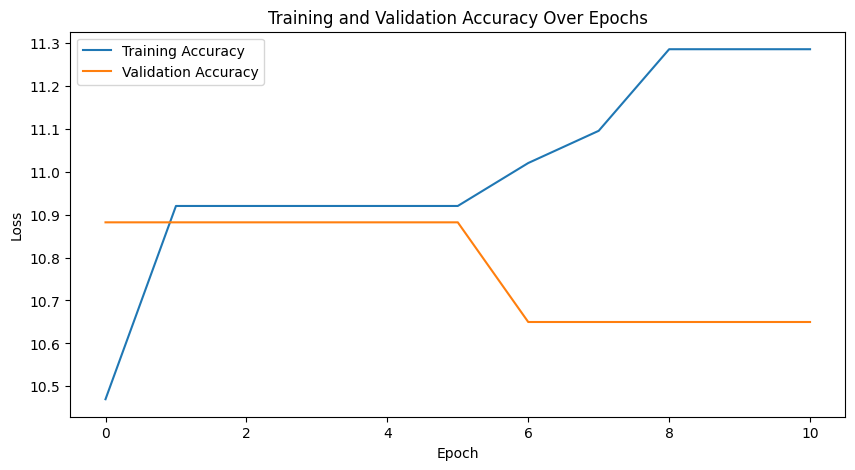

Extracting Embeddings: 100%|██████████| 485/485 [00:06<00:00, 69.79it/s]


Distance between embedding 6589 and 2885: 0.0031
Distance between embedding 6589 and 4016: 0.0037
Distance between embedding 6589 and 5862: 0.0039
Distance between embedding 6589 and 3761: 0.0016
Distance between embedding 6589 and 2201: 0.0011
Distance between embedding 6589 and 6468: 0.0009
Distance between embedding 6589 and 3726: 0.0013
Distance between embedding 6589 and 5161: 0.0011
Distance between embedding 6589 and 1572: 0.0013
Distance between embedding 6589 and 4632: 0.0019
Distance between embedding 6589 and 1639: 0.0010
Distance between embedding 6589 and 399: 0.0013
Distance between embedding 6589 and 1987: 0.0009
Distance between embedding 6589 and 7109: 0.0010
Distance between embedding 6589 and 5832: 0.0011
Distance between embedding 6589 and 6283: 0.0049
Distance between embedding 6589 and 6233: 0.0047
Distance between embedding 6589 and 354: 0.0022
Distance between embedding 6589 and 3924: 0.0028
Distance between embedding 2885 and 4016: 0.0023
Distance between embed

Testing: 100%|██████████| 485/485 [00:06<00:00, 75.06it/s]
/home/aref/.conda/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 10.88%
Test Precision: 0.01
Test Recall: 0.11
Test F1 Score: 0.02
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 29/100:  29%|██▉       | 29/100 [12:49<31:24, 26.54s/it, val_loss=3.44, val_accuracy=63.5, train_loss=2.81, best_accuracy=66.8]


KeyboardInterrupt: 

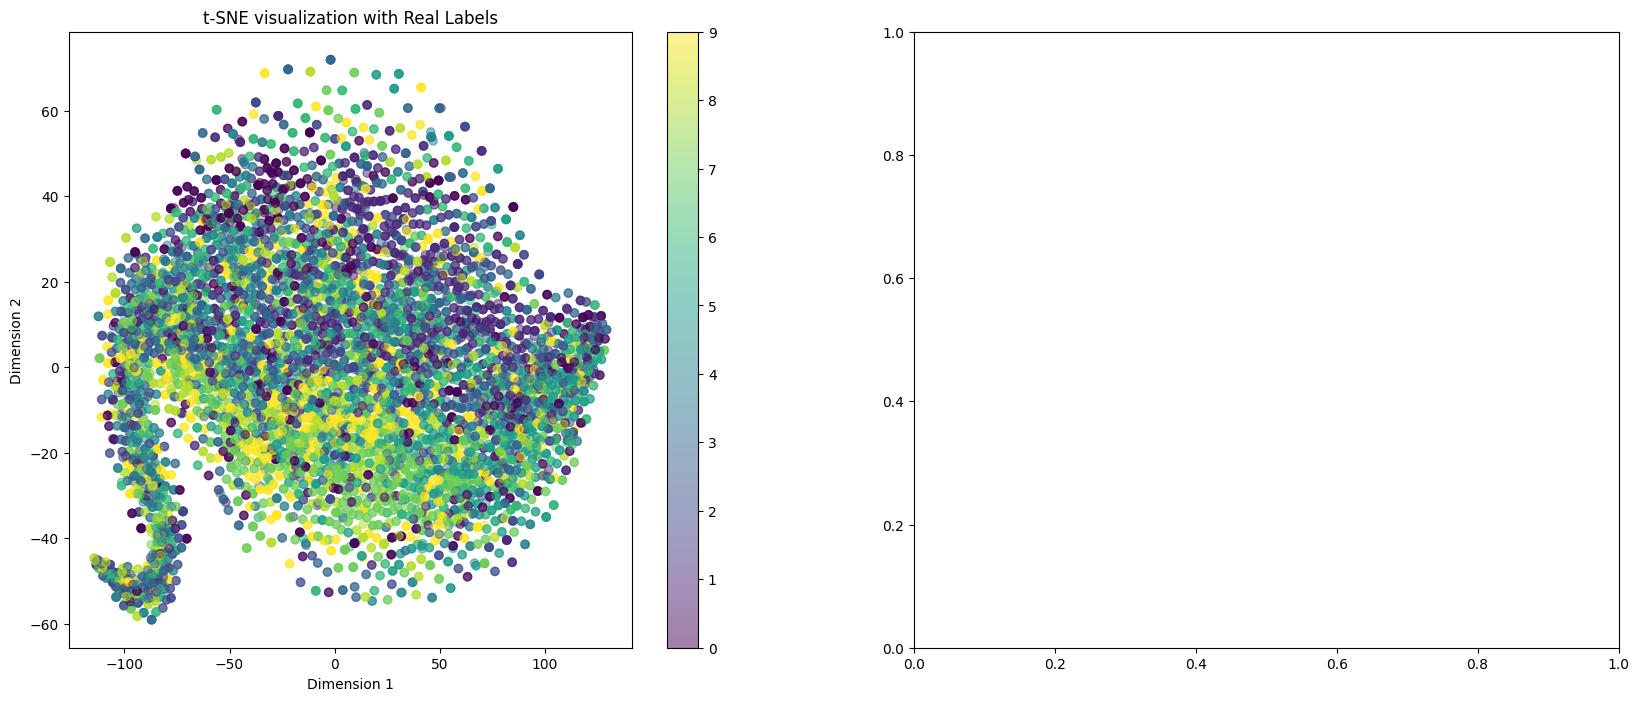

In [ ]:
noise_cleaner.clean()

In [ ]:
import models.predictor
import models
import importlib
importlib.reload(models)
from models import preact
importlib.reload(preact)
from models import predictor
importlib.reload(predictor)
from models.predictor import Predictor

In [ ]:
clean_train_dataset = noise_cleaner.clean_dataset
test_dataset = FashionMNIST(root='data', train=False, download=False)
predictor = Predictor(train_dataset=clean_train_dataset, test_dataset=test_dataset, transform=transform, num_classes=10, model_type='resnet18', batch_size=400)

In [ ]:
predictor.train(10)

Training Epoch 1/10: 100%|██████████| 113/113 [01:40<00:00,  1.12it/s]


Validation Accuracy: 93.46%
Epoch 1/10, Loss: 0.24129432162879844


Training Epoch 2/10: 100%|██████████| 113/113 [01:39<00:00,  1.13it/s]


Validation Accuracy: 96.31%
Epoch 2/10, Loss: 0.12274887458940523


Training Epoch 3/10: 100%|██████████| 113/113 [01:39<00:00,  1.13it/s]


Validation Accuracy: 97.07%
Epoch 3/10, Loss: 0.08064110191390578


Training Epoch 4/10: 100%|██████████| 113/113 [01:39<00:00,  1.14it/s]


Validation Accuracy: 96.81%
Epoch 4/10, Loss: 0.07340764353233101


Training Epoch 5/10: 100%|██████████| 113/113 [01:39<00:00,  1.14it/s]


Validation Accuracy: 96.51%
Epoch 5/10, Loss: 0.059963096196936294


Training Epoch 6/10: 100%|██████████| 113/113 [01:38<00:00,  1.15it/s]


Validation Accuracy: 97.89%
Epoch 6/10, Loss: 0.0528966288980657


Training Epoch 7/10: 100%|██████████| 113/113 [01:40<00:00,  1.13it/s]


Validation Accuracy: 97.85%
Epoch 7/10, Loss: 0.03885995962582858


Training Epoch 8/10: 100%|██████████| 113/113 [01:40<00:00,  1.13it/s]


Validation Accuracy: 97.95%
Epoch 8/10, Loss: 0.03452066272760915


Training Epoch 9/10: 100%|██████████| 113/113 [01:40<00:00,  1.12it/s]


Validation Accuracy: 98.30%
Epoch 9/10, Loss: 0.030963845262551203


Training Epoch 10/10: 100%|██████████| 113/113 [01:39<00:00,  1.13it/s]


Validation Accuracy: 98.22%
Epoch 10/10, Loss: 0.02610123477282777


In [ ]:
predictor.evaluate()

Evaluating: 100%|██████████| 25/25 [00:11<00:00,  2.25it/s]

Test Accuracy: 90.21%


0.9021

## CIFAR 10

In [2]:
train_dataset = CIFAR10(root='data', train=True, download=True)
transform = transforms.Compose([
                                # transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

augmented_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar10/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='resnet50', train_noise_level=0.2, epochs_num=1000, train_pairs=200000, 
                             val_pairs=20000, embedding_dimension=64, lr=1e-5, optimizer='Adam', patience=15, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.5, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=2, freeze_epoch=None, noisy_indices_path='cifar10/resnet50/fold{}_noisy_indices.csv')

Files already downloaded and verified
Seed: 51
noise count: 10208 out of 50000 data


handling big fold 1/10
number_of_pairs: 3591
Training fold 1/10...


Epoch 60/1000:   6%|▌         | 61/1000 [1:44:20<26:46:03, 102.62s/it, val_loss=4.69, val_contrastive=1.4, val_accuracy=58.8, train_loss=4.38, train_contrastive=1.39, best_accuracy=59.8, best_loss=4.69] 


Early stopping triggered
Loading best model from checkpoint...


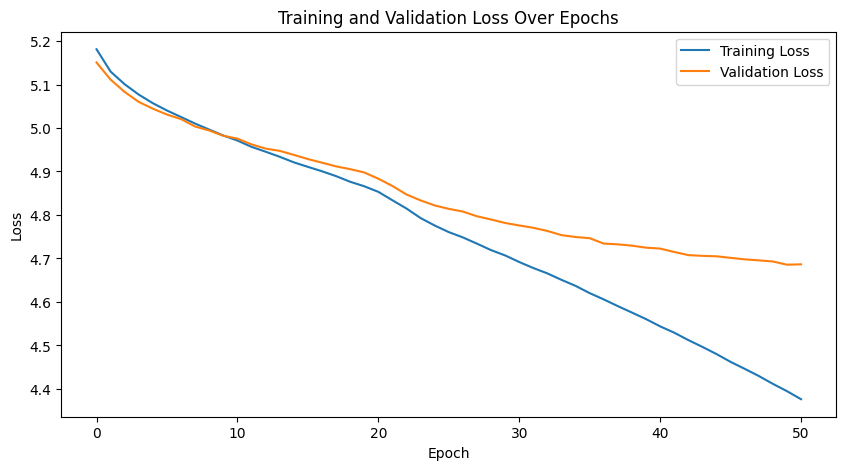

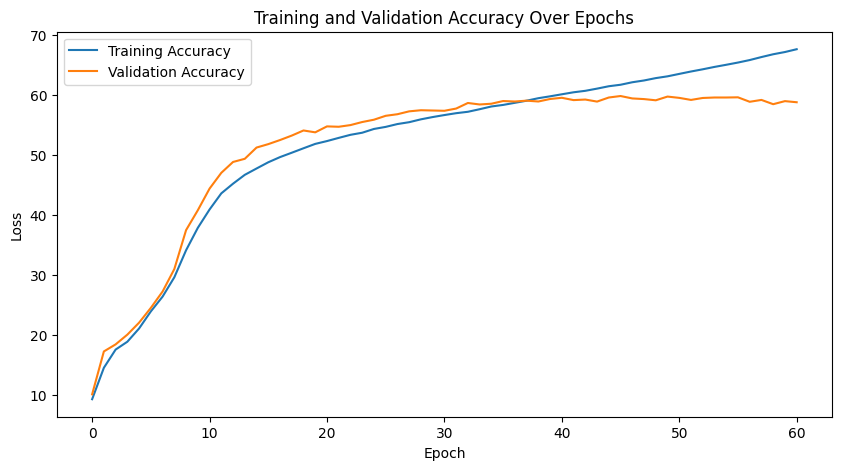

Extracting Embeddings: 100%|██████████| 51/51 [00:01<00:00, 27.54it/s]


Distance between embedding 187 and 1751: 1.3016
Distance between embedding 187 and 6126: 1.5697
Distance between embedding 187 and 4541: 1.2163
Distance between embedding 187 and 793: 1.5269
Distance between embedding 187 and 3529: 1.0308
Distance between embedding 187 and 1194: 1.5285
Distance between embedding 187 and 5741: 1.3078
Distance between embedding 187 and 3768: 1.4349
Distance between embedding 187 and 12: 1.1973
Distance between embedding 187 and 5148: 1.1044
Distance between embedding 187 and 6255: 1.4707
Distance between embedding 187 and 4644: 1.3393
Distance between embedding 187 and 508: 0.9429
Distance between embedding 187 and 4231: 1.1279
Distance between embedding 187 and 5023: 1.0726
Distance between embedding 187 and 5755: 1.4366
Distance between embedding 187 and 1243: 1.1358
Distance between embedding 187 and 1576: 1.5683
Distance between embedding 187 and 4362: 1.5787
Distance between embedding 1751 and 6126: 1.0973
Distance between embedding 1751 and 4541: 1

Testing: 100%|██████████| 51/51 [00:01<00:00, 33.20it/s]
/home/aref/.conda/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 59.79%
Test Precision: 0.57
Test Recall: 0.60
Test F1 Score: 0.58
Model saved to cifar10/resnet50/model_resnet50_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 47/1000:   5%|▍         | 48/1000 [1:22:28<27:15:40, 103.09s/it, val_loss=4.59, val_contrastive=1.43, val_accuracy=63.7, train_loss=4.28, train_contrastive=1.4, best_accuracy=64.8, best_loss=4.59] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 25.01it/s]


Test Accuracy: 64.84%
Test Precision: 0.65
Test Recall: 0.65
Test F1 Score: 0.65
Model saved to cifar10/resnet50/model_resnet50_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/10...


Epoch 64/1000:   6%|▋         | 65/1000 [1:52:01<26:51:25, 103.41s/it, val_loss=4.63, val_contrastive=1.4, val_accuracy=63.1, train_loss=4.3, train_contrastive=1.39, best_accuracy=64.1, best_loss=4.62]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 21.31it/s]


Test Accuracy: 64.14%
Test Precision: 0.64
Test Recall: 0.64
Test F1 Score: 0.64
Model saved to cifar10/resnet50/model_resnet50_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/10...


Epoch 82/1000:   8%|▊         | 83/1000 [2:23:29<26:25:15, 103.72s/it, val_loss=4.51, val_contrastive=1.38, val_accuracy=60.3, train_loss=3.68, train_contrastive=1.47, best_accuracy=61.7, best_loss=4.51]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 20.01it/s]


Test Accuracy: 61.70%
Test Precision: 0.62
Test Recall: 0.62
Test F1 Score: 0.61
Model saved to cifar10/resnet50/model_resnet50_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/10...


Epoch 67/1000:   7%|▋         | 68/1000 [1:57:51<26:55:25, 104.00s/it, val_loss=4.64, val_contrastive=1.37, val_accuracy=61.7, train_loss=4.33, train_contrastive=1.39, best_accuracy=64.1, best_loss=4.64]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 19.41it/s]


Test Accuracy: 64.14%
Test Precision: 0.65
Test Recall: 0.64
Test F1 Score: 0.64
Model saved to cifar10/resnet50/model_resnet50_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/10...


Epoch 63/1000:   6%|▋         | 64/1000 [1:50:34<26:57:10, 103.67s/it, val_loss=4.7, val_contrastive=1.4, val_accuracy=60.5, train_loss=4.22, train_contrastive=1.4, best_accuracy=62.1, best_loss=4.7]    


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 19.17it/s]


Test Accuracy: 62.13%
Test Precision: 0.64
Test Recall: 0.62
Test F1 Score: 0.62
Model saved to cifar10/resnet50/model_resnet50_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/10...


Epoch 66/1000:   7%|▋         | 67/1000 [1:55:56<26:54:28, 103.83s/it, val_loss=4.54, val_contrastive=1.39, val_accuracy=61.7, train_loss=4.13, train_contrastive=1.42, best_accuracy=62.9, best_loss=4.54]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 19.88it/s]


Test Accuracy: 62.93%
Test Precision: 0.63
Test Recall: 0.63
Test F1 Score: 0.63
Model saved to cifar10/resnet50/model_resnet50_cifar10_fold_7.pth
Finished training fold 7
Training fold 8/10...


Epoch 51/1000:   5%|▌         | 52/1000 [1:30:00<27:20:59, 103.86s/it, val_loss=4.64, val_contrastive=1.42, val_accuracy=62.2, train_loss=4.31, train_contrastive=1.38, best_accuracy=63.4, best_loss=4.64]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 19.16it/s]


Test Accuracy: 63.38%
Test Precision: 0.63
Test Recall: 0.63
Test F1 Score: 0.62
Model saved to cifar10/resnet50/model_resnet50_cifar10_fold_8.pth
Finished training fold 8
Training fold 9/10...


Epoch 125/1000:  13%|█▎        | 126/1000 [3:37:41<25:10:01, 103.66s/it, val_loss=4.75, val_contrastive=1.38, val_accuracy=58.5, train_loss=3.73, train_contrastive=1.46, best_accuracy=59.4, best_loss=4.73]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 19.70it/s]


Test Accuracy: 59.39%
Test Precision: 0.60
Test Recall: 0.59
Test F1 Score: 0.59
Model saved to cifar10/resnet50/model_resnet50_cifar10_fold_9.pth
Finished training fold 9
Training fold 10/10...


Epoch 102/1000:  10%|█         | 103/1000 [2:58:21<25:53:13, 103.90s/it, val_loss=4.56, val_contrastive=1.37, val_accuracy=59.7, train_loss=3.63, train_contrastive=1.47, best_accuracy=60.8, best_loss=4.55]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 19.42it/s]


Test Accuracy: 60.77%
Test Precision: 0.61
Test Recall: 0.61
Test F1 Score: 0.61
Model saved to cifar10/resnet50/model_resnet50_cifar10_fold_10.pth
Finished training fold 10


Evaluating Noisy Samples for fold 10: 100%|██████████| 5/5 [00:00<00:00,  6.11it/s]


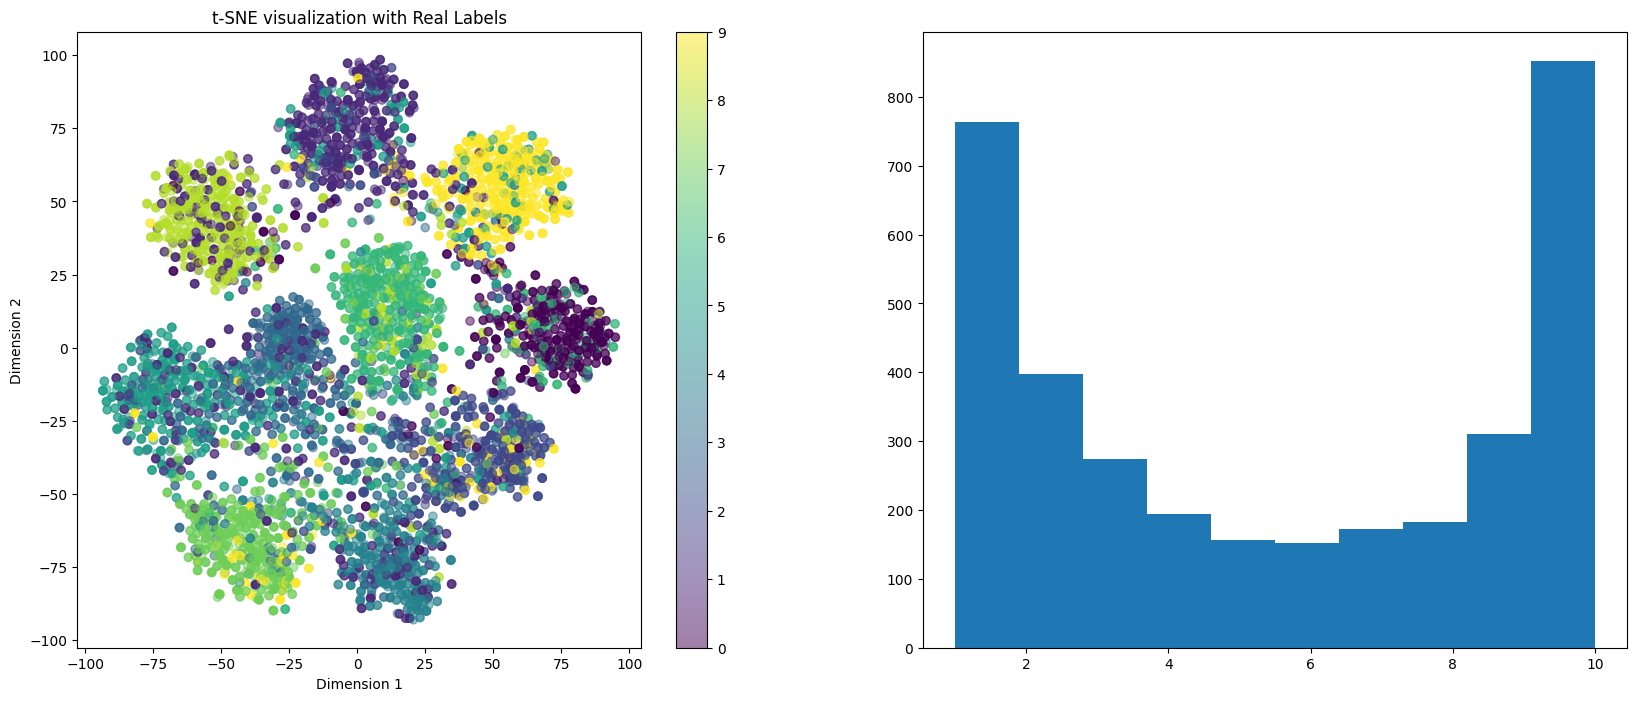

Predicted noise indices: [53, 207, 214, 215, 470, 516, 633, 636, 724, 927, 990, 1001, 1070, 1174, 1191, 1223, 1243, 1248, 1325, 1354, 1613, 1677, 1736, 1740, 1783, 1807, 1899, 2049, 2131, 2151, 2164, 2169, 2197, 2388, 2423, 2424, 2484, 2513, 2698, 2708, 2729, 2822, 2860, 2870, 3141, 3235, 3326, 3386, 3439, 3458, 3520, 3554, 3613, 3649, 3685, 3797, 3872, 3882, 3998, 4046, 4078, 4095, 4109, 4297, 4427, 4531, 4690, 4745, 4825, 4847, 4853, 4928, 4959, 4971, 5097, 5218, 5248, 5377, 5520, 5572, 5609, 5639, 5695, 5703, 5821, 5878, 5915, 5926, 6009, 6035, 6057, 6115, 6276, 6324, 6382, 6416, 6443, 6475, 6480, 6743, 6792, 6875, 6901, 6918, 6941, 7005, 7106, 7116, 7171, 7226, 7242, 7307, 7338, 7378, 7432, 7568, 7671, 7686, 7729, 7756, 7806, 7818, 7849, 7951, 8062, 8109, 8310, 8349, 8360, 8398, 8411, 8485, 8593, 8643, 8644, 8685, 8704, 8722, 8731, 8732, 8735, 8783, 8788, 8797, 8855, 8885, 8921, 8934, 8937, 8996, 9097, 9218, 9237, 9254, 9263, 9300, 9366, 9386, 9463, 9525, 9538, 9720, 9745, 9754, 98

Epoch 58/1000:   6%|▌         | 59/1000 [1:42:28<27:14:17, 104.21s/it, val_loss=4.75, val_contrastive=1.4, val_accuracy=61.5, train_loss=4.45, train_contrastive=1.38, best_accuracy=62.7, best_loss=4.75] 


Early stopping triggered
Loading best model from checkpoint...


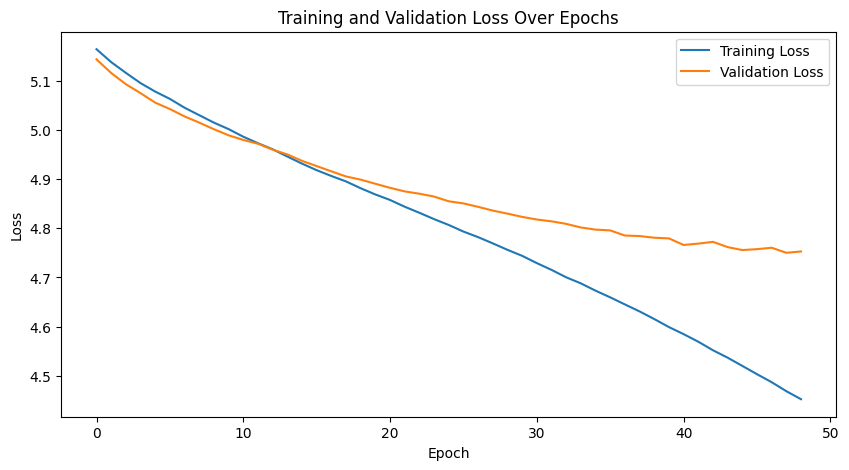

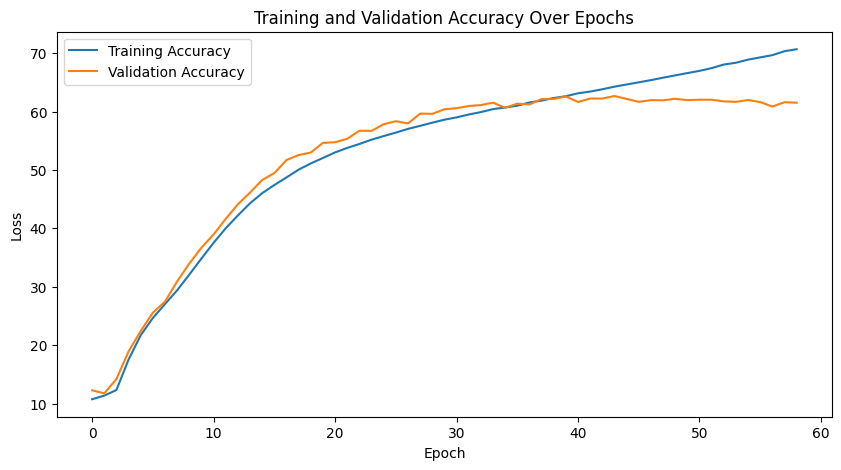

Extracting Embeddings: 100%|██████████| 51/51 [00:02<00:00, 17.09it/s]


Distance between embedding 2330 and 2514: 1.6261
Distance between embedding 2330 and 4018: 1.1195
Distance between embedding 2330 and 1: 1.6143
Distance between embedding 2330 and 4247: 1.4559
Distance between embedding 2330 and 4954: 1.3925
Distance between embedding 2330 and 260: 1.4014
Distance between embedding 2330 and 4741: 1.0603
Distance between embedding 2330 and 4945: 1.4844
Distance between embedding 2330 and 621: 1.5761
Distance between embedding 2330 and 2087: 1.5167
Distance between embedding 2330 and 868: 1.5002
Distance between embedding 2330 and 5187: 1.6720
Distance between embedding 2330 and 5234: 1.6346
Distance between embedding 2330 and 6086: 1.0789
Distance between embedding 2330 and 4572: 1.3912
Distance between embedding 2330 and 3583: 1.3178
Distance between embedding 2330 and 3638: 1.4717
Distance between embedding 2330 and 624: 1.3718
Distance between embedding 2330 and 4906: 1.7225
Distance between embedding 2514 and 4018: 1.4018
Distance between embedding 

Testing: 100%|██████████| 51/51 [00:02<00:00, 19.46it/s]


Test Accuracy: 62.67%
Test Precision: 0.63
Test Recall: 0.63
Test F1 Score: 0.63
Model saved to cifar10/resnet50/model_resnet50_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 52/1000:   5%|▌         | 53/1000 [1:32:27<27:32:01, 104.67s/it, val_loss=4.66, val_contrastive=1.42, val_accuracy=62.5, train_loss=4.38, train_contrastive=1.39, best_accuracy=63.6, best_loss=4.66]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.86it/s]


Test Accuracy: 63.64%
Test Precision: 0.64
Test Recall: 0.64
Test F1 Score: 0.64
Model saved to cifar10/resnet50/model_resnet50_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/10...


Epoch 55/1000:   6%|▌         | 56/1000 [1:37:29<27:23:20, 104.45s/it, val_loss=4.5, val_contrastive=1.43, val_accuracy=63.4, train_loss=4.04, train_contrastive=1.44, best_accuracy=66.4, best_loss=4.49] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 19.22it/s]


Test Accuracy: 66.41%
Test Precision: 0.67
Test Recall: 0.66
Test F1 Score: 0.66
Model saved to cifar10/resnet50/model_resnet50_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/10...


Epoch 59/1000:   6%|▌         | 60/1000 [1:44:10<27:12:02, 104.17s/it, val_loss=4.5, val_contrastive=1.4, val_accuracy=61.8, train_loss=4, train_contrastive=1.44, best_accuracy=64.8, best_loss=4.49]     


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.33it/s]


Test Accuracy: 64.76%
Test Precision: 0.65
Test Recall: 0.65
Test F1 Score: 0.64
Model saved to cifar10/resnet50/model_resnet50_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/10...


Epoch 58/1000:   6%|▌         | 59/1000 [1:42:34<27:15:54, 104.31s/it, val_loss=4.47, val_contrastive=1.42, val_accuracy=64.9, train_loss=4.09, train_contrastive=1.42, best_accuracy=66.6, best_loss=4.47]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.51it/s]


Test Accuracy: 66.62%
Test Precision: 0.67
Test Recall: 0.67
Test F1 Score: 0.66
Model saved to cifar10/resnet50/model_resnet50_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/10...


Epoch 76/1000:   8%|▊         | 77/1000 [2:13:50<26:44:21, 104.29s/it, val_loss=4.68, val_contrastive=1.41, val_accuracy=64.5, train_loss=4.33, train_contrastive=1.39, best_accuracy=65.7, best_loss=4.68]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:03<00:00, 16.84it/s]


Test Accuracy: 65.69%
Test Precision: 0.67
Test Recall: 0.66
Test F1 Score: 0.65
Model saved to cifar10/resnet50/model_resnet50_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/10...


Epoch 106/1000:  11%|█         | 107/1000 [3:05:42<25:49:49, 104.13s/it, val_loss=4.57, val_contrastive=1.4, val_accuracy=60.8, train_loss=3.48, train_contrastive=1.5, best_accuracy=62, best_loss=4.56]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 19.25it/s]


Test Accuracy: 62.02%
Test Precision: 0.62
Test Recall: 0.62
Test F1 Score: 0.62
Model saved to cifar10/resnet50/model_resnet50_cifar10_fold_7.pth
Finished training fold 7
Training fold 8/10...


Epoch 65/1000:   7%|▋         | 66/1000 [1:54:45<27:04:02, 104.33s/it, val_loss=4.5, val_contrastive=1.43, val_accuracy=62.7, train_loss=4.02, train_contrastive=1.45, best_accuracy=65.1, best_loss=4.5]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.89it/s]


Test Accuracy: 65.13%
Test Precision: 0.65
Test Recall: 0.65
Test F1 Score: 0.65
Model saved to cifar10/resnet50/model_resnet50_cifar10_fold_8.pth
Finished training fold 8
Training fold 9/10...


Epoch 52/1000:   5%|▌         | 53/1000 [1:32:01<27:24:13, 104.17s/it, val_loss=4.56, val_contrastive=1.44, val_accuracy=63.3, train_loss=4.14, train_contrastive=1.43, best_accuracy=64.9, best_loss=4.56]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.92it/s]


Test Accuracy: 64.88%
Test Precision: 0.65
Test Recall: 0.65
Test F1 Score: 0.65
Model saved to cifar10/resnet50/model_resnet50_cifar10_fold_9.pth
Finished training fold 9
Training fold 10/10...


Epoch 52/1000:   5%|▌         | 53/1000 [1:32:03<27:24:59, 104.22s/it, val_loss=4.44, val_contrastive=1.37, val_accuracy=63, train_loss=4.07, train_contrastive=1.41, best_accuracy=64.3, best_loss=4.43]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 19.07it/s]


Test Accuracy: 64.26%
Test Precision: 0.64
Test Recall: 0.64
Test F1 Score: 0.64
Model saved to cifar10/resnet50/model_resnet50_cifar10_fold_10.pth
Finished training fold 10


Evaluating Noisy Samples for fold 10: 100%|██████████| 5/5 [00:00<00:00,  6.12it/s]


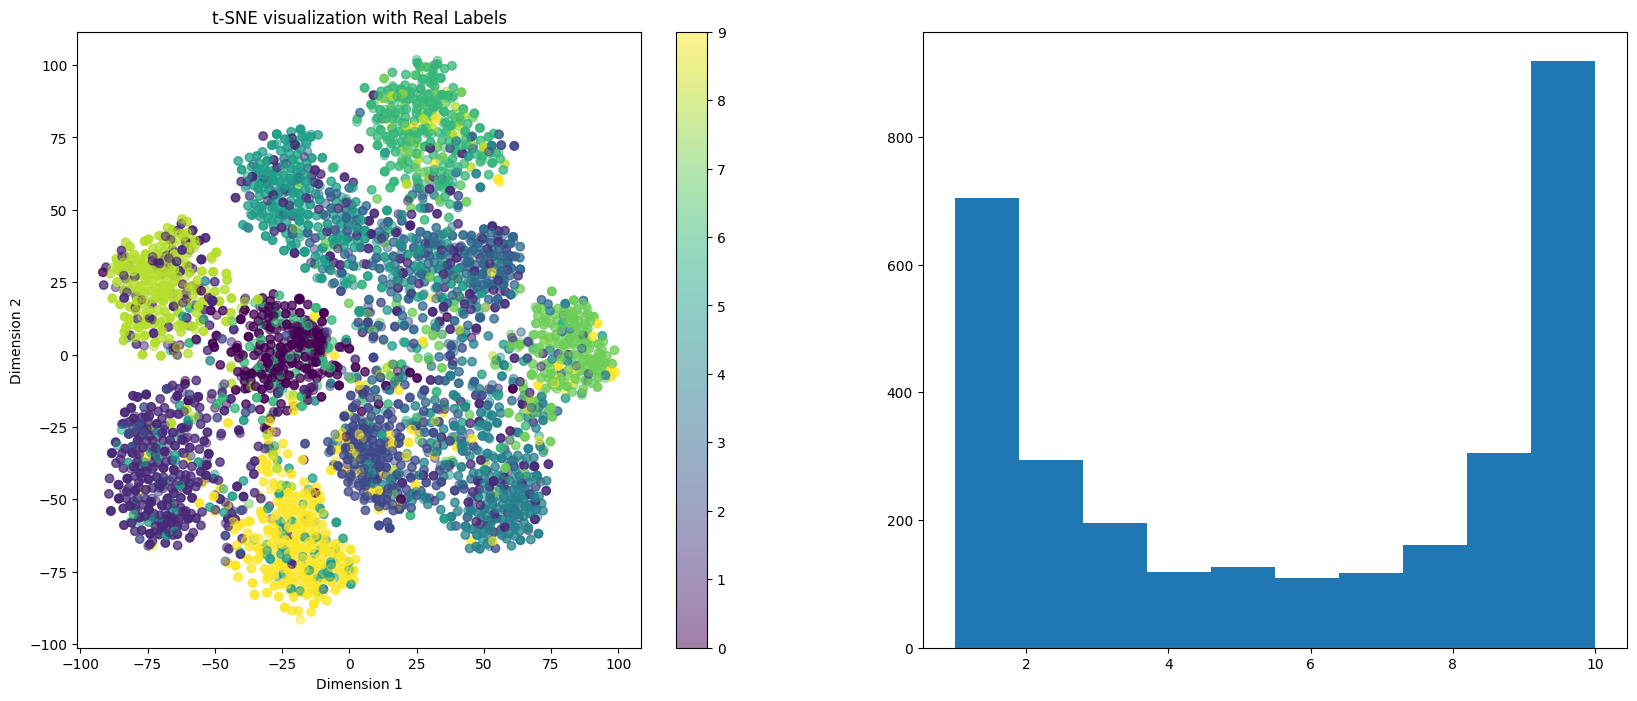

Predicted noise indices: [19, 56, 182, 185, 459, 472, 482, 548, 621, 627, 702, 820, 832, 914, 963, 975, 981, 986, 1003, 1049, 1059, 1063, 1069, 1081, 1083, 1161, 1167, 1318, 1321, 1335, 1405, 1523, 1642, 1674, 1722, 1770, 2018, 2053, 2098, 2179, 2191, 2280, 2291, 2356, 2363, 2535, 2541, 2554, 2597, 2610, 2659, 2689, 2711, 2792, 2818, 2919, 2960, 3029, 3098, 3160, 3292, 3294, 3503, 3551, 3650, 3726, 3752, 3883, 3886, 3896, 3976, 3990, 4084, 4203, 4249, 4279, 4377, 4404, 4447, 4453, 4462, 4516, 4543, 4552, 4558, 4571, 4576, 4598, 4685, 4783, 4880, 5013, 5014, 5077, 5081, 5147, 5184, 5221, 5245, 5440, 5518, 5528, 5560, 5593, 5598, 5702, 5730, 5731, 5818, 5924, 5976, 6106, 6133, 6215, 6247, 6271, 6290, 6368, 6544, 6631, 6638, 6666, 6695, 6732, 6763, 6786, 6789, 6804, 6898, 6917, 6990, 7002, 7009, 7073, 7075, 7100, 7141, 7153, 7189, 7272, 7275, 7317, 7430, 7482, 7637, 7645, 7666, 7795, 7811, 7874, 7948, 8106, 8137, 8201, 8222, 8326, 8383, 8736, 8757, 8773, 8791, 8808, 8865, 8873, 8887, 9014

Epoch 56/1000:   6%|▌         | 57/1000 [1:38:52<27:15:40, 104.07s/it, val_loss=4.59, val_contrastive=1.42, val_accuracy=61.9, train_loss=4.23, train_contrastive=1.43, best_accuracy=64.9, best_loss=4.59]


Early stopping triggered
Loading best model from checkpoint...


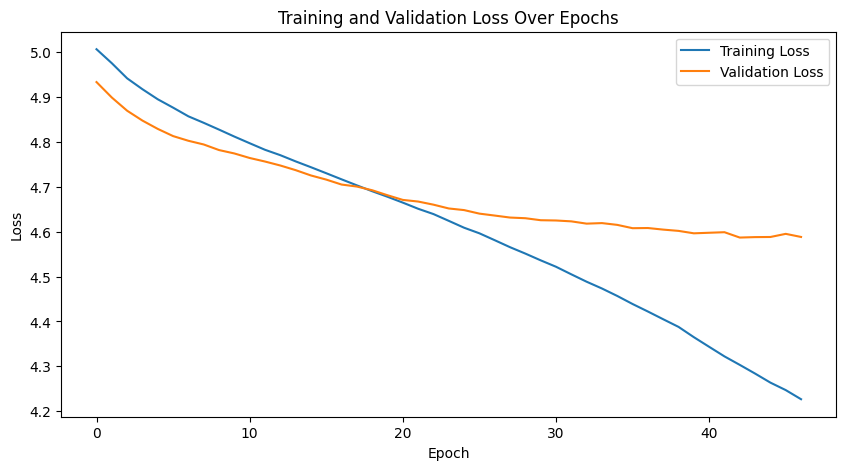

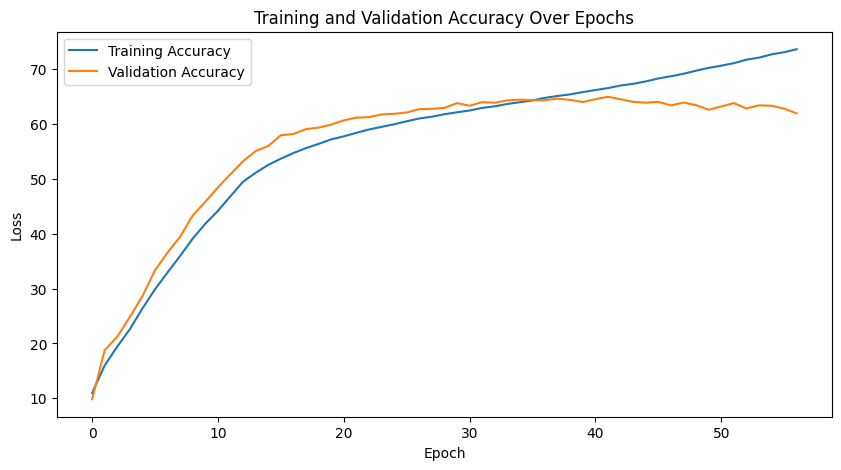

Extracting Embeddings: 100%|██████████| 51/51 [00:02<00:00, 17.72it/s]


Distance between embedding 6333 and 3411: 1.0579
Distance between embedding 6333 and 2146: 0.9487
Distance between embedding 6333 and 5317: 1.3715
Distance between embedding 6333 and 6463: 1.2132
Distance between embedding 6333 and 3804: 1.1720
Distance between embedding 6333 and 6104: 0.9922
Distance between embedding 6333 and 6203: 1.1298
Distance between embedding 6333 and 5649: 1.3423
Distance between embedding 6333 and 2783: 1.1197
Distance between embedding 6333 and 4311: 1.2499
Distance between embedding 6333 and 3490: 1.1701
Distance between embedding 6333 and 1853: 1.1926
Distance between embedding 6333 and 3921: 1.3841
Distance between embedding 6333 and 4131: 1.1349
Distance between embedding 6333 and 2492: 1.3183
Distance between embedding 6333 and 2247: 1.2369
Distance between embedding 6333 and 4355: 1.2704
Distance between embedding 6333 and 3412: 1.4576
Distance between embedding 6333 and 1882: 1.0953
Distance between embedding 3411 and 2146: 1.1084
Distance between emb

Testing: 100%|██████████| 51/51 [00:02<00:00, 18.44it/s]


Test Accuracy: 64.94%
Test Precision: 0.65
Test Recall: 0.65
Test F1 Score: 0.65
Model saved to cifar10/resnet50/model_resnet50_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 87/1000:   9%|▉         | 88/1000 [2:32:40<26:22:17, 104.10s/it, val_loss=4.61, val_contrastive=1.44, val_accuracy=62.2, train_loss=4.11, train_contrastive=1.43, best_accuracy=63.2, best_loss=4.61]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 51/51 [00:02<00:00, 18.71it/s]


Test Accuracy: 63.21%
Test Precision: 0.64
Test Recall: 0.63
Test F1 Score: 0.63
Model saved to cifar10/resnet50/model_resnet50_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/10...


Epoch 54/1000:   5%|▌         | 54/1000 [1:34:00<28:02:52, 106.74s/it, val_loss=4.74, val_contrastive=1.38, val_accuracy=62.2, train_loss=4.57, train_contrastive=1.35, best_accuracy=63.5, best_loss=4.74]

In [ ]:
noise_cleaner.clean()

In [3]:
noise_cleaner.save_cleaned_cifar_dataset('cleaned', 'CIFAR10')

100%|██████████| 50000/50000 [00:01<00:00, 38623.16it/s]

Cleaned dataset saved to cleaned/CIFAR10.pkl


In [4]:
from models.dataset import CleanDatasetLoader

cleaned_dataset = CleanDatasetLoader('cleaned/CIFAR10.pkl', transforms.Compose([transforms.ToTensor()]))

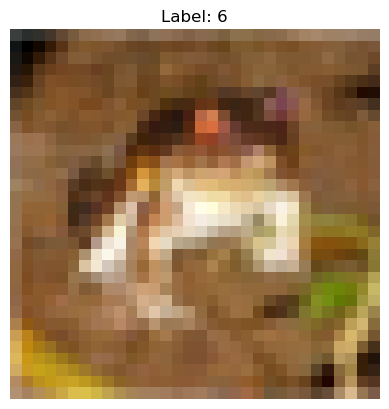

In [4]:
import matplotlib.pyplot as plt
img, label = train_dataset[0]

# Convert the image tensor to a PIL Image
try:
    img = transforms.ToPILImage()(img)
except:
    a =2

# Plot the image
plt.imshow(img)
plt.title(f'Label: {label.item()}')
plt.axis('off')  # Hide axes
plt.show()

## TMP

In [ ]:
import torch
import torch.functional as F
import torch.nn.functional as F
import torch.nn as nn
from torchvision.models import resnet18, ResNet18_Weights
from torchvision.models import resnet34, ResNet34_Weights
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.models import wide_resnet50_2, Wide_ResNet50_2_Weights
from torchvision.models import vgg16_bn, VGG16_BN_Weights
from torchvision.models import vgg19_bn, VGG19_BN_Weights
from models.preact import *
from models.cnn import CustomCNN
from models.dla import DLA
from torchsummary import summary

pre_trained = True
base_model = nn.Sequential(
                nn.Conv2d(3, 32, 3, stride=1, padding=1),  #out ->  b, 16, 14, 14
                nn.ReLU(True),
                nn.MaxPool2d(kernel_size=2, stride=2),  #out -> b, 16, 8, 8
                
                nn.Conv2d(32, 64, 3, stride=1, padding=1),  #out -> b, 8, 8, 8
                nn.ReLU(True),
                nn.MaxPool2d(kernel_size=2, stride=2, padding=1),  #out -> b, 8, 5, 5
                nn.Flatten(),
                
                nn.Linear(5184, 256),
                nn.ReLU(),
                )
base_model.fc = nn.Flatten()

base_model = base_model.cuda()
if hasattr(base_model, 'fc'):
    base_model.fc = nn.Flatten()
    feature_extractor = base_model
else:
    feature_extractor = nn.Sequential(*list(base_model.children())[:-1])
summary(feature_extractor, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
         MaxPool2d-3           [-1, 32, 16, 16]               0
            Conv2d-4           [-1, 64, 16, 16]          18,496
              ReLU-5           [-1, 64, 16, 16]               0
         MaxPool2d-6             [-1, 64, 9, 9]               0
           Flatten-7                 [-1, 5184]               0
            Linear-8                  [-1, 256]       1,327,360
              ReLU-9                  [-1, 256]               0
          Flatten-10                  [-1, 256]               0
Total params: 1,346,752
Trainable params: 1,346,752
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.90
Params size (MB): 5.14
Estimat

## New Expreiment

In [ ]:
from models.vae import *  # Import your custom VAE model and loss
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from models.dataset import CustomDataset  # Assuming CustomDataset is custom-made

# Define transformations with augmentations
augmented_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomCrop(size=64, padding=4),  # Random cropping with padding
    transforms.AutoAugment(policy=transforms.autoaugment.AutoAugmentPolicy.CIFAR10),  # AutoAugment for CIFAR10
    transforms.Grayscale(num_output_channels=3),  # Convert to grayscale with 3 channels to match input
    transforms.ToTensor()  # Convert to tensor
])

# Load CIFAR10 dataset
train_dataset = datasets.CIFAR10(root='data', train=True, download=False)

# Wrap the CIFAR10 dataset using CustomDataset (assuming it's necessary)
dataset = CustomDataset(train_dataset, transform=augmented_transform)

# DataLoader with batch size and shuffling (shuffle=True for training)
train_loader = DataLoader(dataset, batch_size=800, shuffle=True)

# Initialize the VAE loss function (MSE reconstruction loss)
vae_loss_fn = VAELoss(reconstruction_loss_type="mse")

# Define VAE parameters
latent_dim = 20
hidden_dim = 256
output_dim = 32*32  # Output feature dimension from ResNet18

# Initialize the VAE model
vae = VAE(latent_dim)

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vae = vae.to(device)

# Optimizer (Adam)
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

# Training loop function
def train(epoch):
    vae.train()  # Set the model to training mode
    train_loss = 0  # Track the total loss
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)  # Move the data to the GPU if available
        optimizer.zero_grad()  # Reset the gradients
        recon_batch, mu, logvar = vae(data)  # Forward pass through VAE
        loss = vae_loss_fn(recon_batch, data, mu, logvar)  # Calculate VAE loss
        loss.backward()  # Backpropagation
        train_loss += loss.item()  # Accumulate the loss
        optimizer.step()  # Update model parameters

    # Print the average loss for the epoch
    print(f'Epoch {epoch}, Loss: {train_loss / len(train_loader.dataset)}')

# Train the VAE model for 10 epochs
for epoch in range(1, 11):
    train(epoch)

Epoch 1, Loss: 116613.89822875
Epoch 2, Loss: 652.5716528125
Epoch 3, Loss: 568.0243871875
Epoch 4, Loss: 514.767764375
Epoch 5, Loss: 486.0452425
Epoch 6, Loss: 462.51460625
Epoch 7, Loss: 445.3024959375
Epoch 8, Loss: 435.4643065625
Epoch 9, Loss: 421.8742640625
Epoch 10, Loss: 410.498935625


In [ ]:
for epoch in range(11, 251):
    train(epoch)

Epoch 11, Loss: 201.806855
Epoch 12, Loss: 202.6633796875
Epoch 13, Loss: 201.838084375
Epoch 14, Loss: 201.56012296875
Epoch 15, Loss: 201.4204365625
Epoch 16, Loss: 200.68404078125
Epoch 17, Loss: 201.663695
Epoch 18, Loss: 200.3300196875
Epoch 19, Loss: 199.64572921875
Epoch 20, Loss: 199.5438884375
Epoch 21, Loss: 200.0736596875
Epoch 22, Loss: 199.000961875
Epoch 23, Loss: 198.2702909375
Epoch 24, Loss: 198.83876625
Epoch 25, Loss: 198.64641234375
Epoch 26, Loss: 198.174250625
Epoch 27, Loss: 198.654705
Epoch 28, Loss: 197.083101875
Epoch 29, Loss: 197.42817328125
Epoch 30, Loss: 198.018560625
Epoch 31, Loss: 198.42947609375
Epoch 32, Loss: 197.05003609375
Epoch 33, Loss: 196.3795140625
Epoch 34, Loss: 196.21175421875
Epoch 35, Loss: 195.6715984375
Epoch 36, Loss: 195.1604253125
Epoch 37, Loss: 194.5808478125
Epoch 38, Loss: 194.105665625
Epoch 39, Loss: 193.917190625
Epoch 40, Loss: 194.8503015625
Epoch 41, Loss: 194.7926415625
Epoch 42, Loss: 194.34278609375
Epoch 43, Loss: 193.

KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch

def extract_embeddings(vae: VAE, dataloader, device):
    vae.eval()
    embeddings = []
    labels = []
    
    with torch.no_grad():
        for data, targets in dataloader:
            data = data.to(device)
            z = vae.latent_embedding(data)
            embeddings.append(z.cpu().numpy())
            labels.append(targets.numpy())

    embeddings = np.concatenate(embeddings, axis=0)
    labels = np.concatenate(labels, axis=0)
    return embeddings, labels

def apply_tsne(embeddings):
    tsne = TSNE(n_components=2, random_state=0)
    embeddings_2d = tsne.fit_transform(embeddings)
    return embeddings_2d

def plot_embeddings(embeddings_2d, labels):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.colorbar(scatter)
    plt.title('2D t-SNE of VAE Embeddings')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()


In [ ]:
embeddings, labels = extract_embeddings(vae, train_loader, device)
embeddings_2d = apply_tsne(embeddings)
plot_embeddings(embeddings_2d, labels)

KeyboardInterrupt: 

## Animal10N

In [ ]:
from models.dataset import Animal10NDataset
from models.siamese_tester import SiameseTester
from models.siamese import *
from models.predefined import InstanceDependentNoiseAdder
from torchvision import transforms
from torchvision.datasets import FashionMNIST, CIFAR10, CIFAR100, MNIST
from models.cleaner import NoiseCleaner
from models.predictor import Predictor

train_dataset = Animal10NDataset('data/Animal10N/training')
test_dataset = Animal10NDataset('data/Animal10N/testing')
transform = transforms.Compose([
                                #transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
augmented_transform = transforms.Compose([
                                transforms.RandomCrop(size=64, padding=4),
                                #transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
noise_cleaner = NoiseCleaner(train_dataset, noise_type='none', model_save_path="cifar10/resnet34/model_resnet34_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='vgg19-bn', train_noise_level=0, epochs_num=500, train_pairs=200000, 
                             val_pairs=10000, embedding_dimension=128, lr=1e-3, optimizer='Adam', patience=7, transform=transform,
                             weight_decay=0.0005, training_batch_size=450, pre_trained=False, dropout_prob=0.2, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', cnn_size=None)

In [ ]:
noise_cleaner.clean()

Seed: 74


Epoch 17/50:  32%|███▏      | 16/50 [00:40<01:25,  2.52s/it, train_loss=4.99, val_loss=4.96, val_accuracy=12.8]

Early stopping triggered
Loading best model from checkpoint...
best accuracy: 12.75


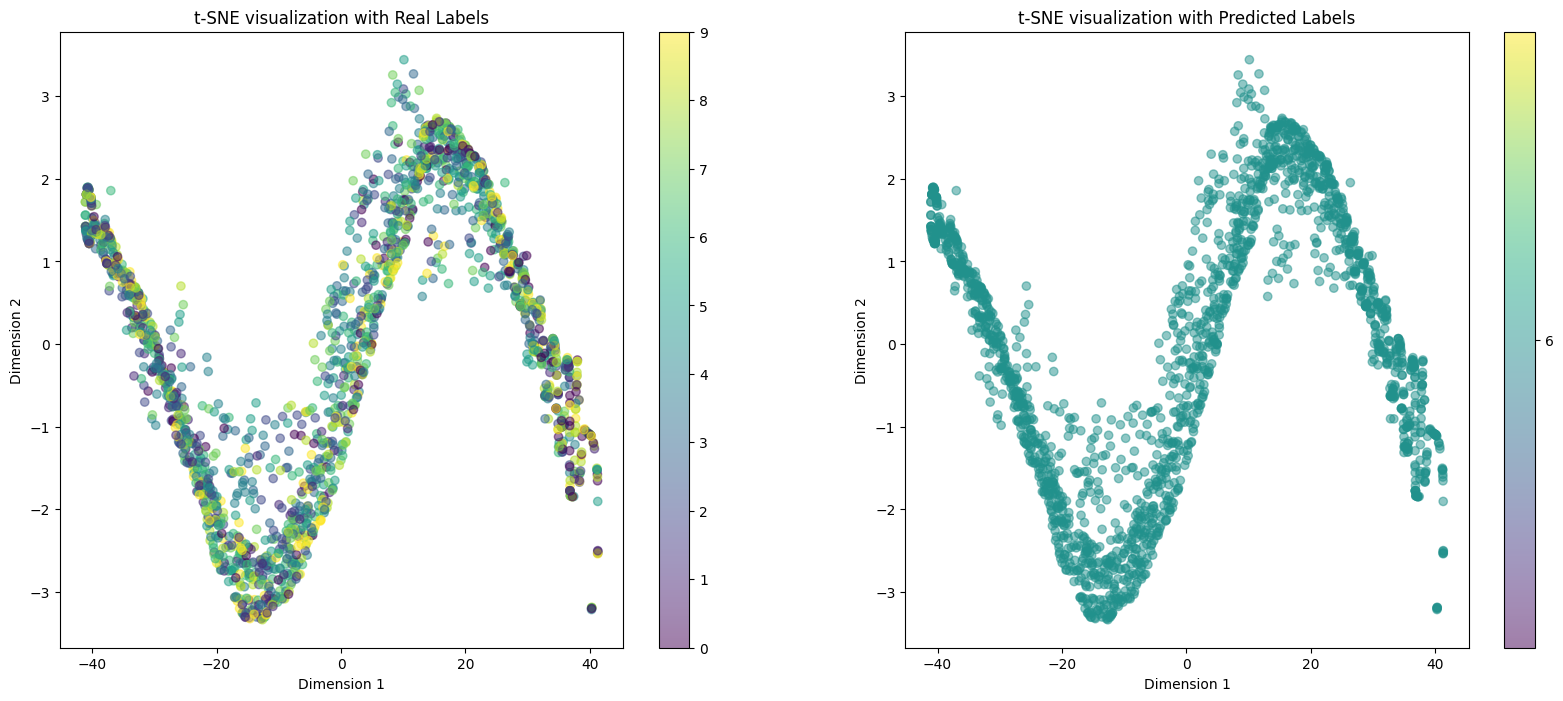

In [ ]:
from models.siamese_tester import SiameseTester
from models.siamese import *
from models.predefined import InstanceDependentNoiseAdder

transform = transforms.Compose([                                
                                transforms.RandomCrop(size=32, padding=4),
                                transforms.RandomHorizontalFlip(),
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
augmented_transform = transforms.Compose([
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
train_dataset = CIFAR10(root='data', train=True, download=False)
train_noise_adder = InstanceDependentNoiseAdder(train_dataset, image_size=3072, ratio=0.2, num_classes=10)
train_noise_adder.add_noise()
tester = SiameseTester(train_dataset, SiameseNetwork, transform=transform, augmented_transform=augmented_transform)
tester.train(50)

In [ ]:
transform = transforms.Compose([transforms.RandomCrop(32, padding=4), transforms.RandomHorizontalFlip(), transforms.ToTensor()])

In [ ]:
clean_train_dataset = noise_cleaner.clean_dataset
test_dataset = CIFAR10(root='data', train=False, download=False)
predictor = Predictor(train_dataset=clean_train_dataset, test_dataset=test_dataset, transform=transform, num_classes=10, 
                      model_type='resnet18', batch_size=2048, pre_trained=True, weight_decay=0.0005)

In [ ]:
predictor.train(120)

In [ ]:
predictor.evaluate()

Evaluating: 100%|██████████| 5/5 [00:01<00:00,  4.70it/s]

Test Accuracy: 77.23%


0.7723

In [ ]:
predictor.free_model()

In [ ]:
for i in range(5):
    predictor.train(2)
    predictor.evaluate()